In [1]:
# Import dependencies

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm


In [30]:
# EDA Functions
def load_and_extract_data(path_to_csv):
    # List all files in the directory and filter for CSV files
    csv_files = [file for file in os.listdir(path_to_csv) if file.endswith('.csv')]
    print(csv_files)
    count = len(csv_files)

    try:
        combined = pd.read_csv(os.path.join(path_to_csv,csv_files[0]))
        combined.reset_index()
        for i in tqdm(range(1,count),desc="Loading data from CSV and combining to a single DataFrame"):
            temp_df = pd.read_csv(os.path.join(path_to_csv,csv_files[i]))
            temp_df.reset_index()
            combined = pd.concat([combined,temp_df],axis=0)
    except Exception as e:
        print(f"{e}")

    return combined

def clean_data(df):
    """
    Clean the data: handle missing values and duplicates.
    """
    print("\n--- Cleaning Data ---")
    
    # Drop duplicate rows
    initial_shape = df.shape
    df = df.drop_duplicates()
    print(f"Removed duplicates: {initial_shape[0] - df.shape[0]} rows dropped.")
    
    # Fill missing numeric columns with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    # Fill missing categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    print("Missing values handled.")
    return df

def visualize_outliers(df, y_value_column):
    # Boxplot
    sns.boxplot(data=df, y=y_value_column)
    plt.title("Boxplot for Outlier Detection")
    plt.show()

def remove_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print("Outliers:")
    print(outliers)

    # Remove outliers
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_cleaned

def visualize_data(df):
    """
    Visualize the data: distributions and correlations.
    """
    print("\n--- Visualizing Data ---")
    plt.figure(figsize=(10, 6))
    
    # Pairplot for numerical columns
    print("Generating pairplot...")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        sns.pairplot(df[numeric_cols])
        plt.show()
    
    # Heatmap for correlation
    print("Generating heatmap...")
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

def slice_by_city(city_name, city_column_name, data_frame):
    sliced_df = data_frame[data_frame[city_column_name] == city_name]
    return sliced_df

def slice_by_date(start_date, end_date, date_column_name, data_frame):
    sliced_df.reset_index()
    data_frame.set_index(date_column_name,inplace=True)
    sliced_df = data_frame[(data_frame.index >= start_date) & (data_frame.index <= end_date)]
    
    return sliced_df

def print_and_plot_corr_matrix(data_frame,columns):
    correlation_matrix = data_frame[columns].corr()
    print(correlation_matrix)
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

def plot_data(data_frame,plot_title,plot_flagsize):
    # Plot to visualize:
    data_frame.plot(
        title= plot_title,
        figsize=plot_flagsize
    )

    plt.show()

In [31]:
# Load the CSV file into a Pandas DataFrame
# Replace 'data.csv' with the path to your CSV file
#file_path = r"data/Los Angeles 2019 data.csv"
#df = pd.read_csv(file_path)
df = load_and_extract_data("data")
df = df[['Date', 'CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df['Date'] = pd.to_datetime(df['Date'])
# Display the first few rows of the dataset
display("First 5 rows of the dataset:")
display(df.head())

# Display basic information about the dataset
display("\nDataset Information:")
display(df.info())

# Display basic statistics for numeric columns
display("\nDescriptive Statistics:")
display(df.describe())

# Check for missing values
display("\nMissing Values:")
display(df.isnull().sum())

# Check for duplicate rows
display("\nDuplicate Rows:")
display(df.duplicated().sum())

# View the shape of the dataset
display("\nShape of the dataset:")
display(df.shape)

# Column-wise data types
display("\nColumn-wise Data Types:")
display(df.dtypes)


['Juneau 2019 data.csv', 'Juneau 2020 data.csv', 'Juneau 2021 data.csv', 'Los Angeles 2019 data.csv', 'Los Angeles 2020 data.csv', 'Los Angeles 2021 data.csv', 'St. Louis 2019 data.csv', 'St. Louis 2020 data.csv', 'St. Louis 2021 data.csv', 'Tallahassee 2019 data.csv', 'Tallahassee 2020 data.csv', 'Tallahassee 2021 data.csv']


Loading data from CSV and combining to a single DataFrame: 100%|██████████| 11/11 [00:00<00:00, 32.98it/s]


'First 5 rows of the dataset:'

,Date,CBSA Name,Local Site Name,Daily AQI Value,Daily Mean PM2.5 Concentration
0,2019-01-01,"Juneau, AK",Floyd Dryden Middle School,39,7.0
1,2019-01-02,"Juneau, AK",Floyd Dryden Middle School,29,5.3
2,2019-01-03,"Juneau, AK",Floyd Dryden Middle School,57,12.2
3,2019-01-04,"Juneau, AK",Floyd Dryden Middle School,75,22.0
4,2019-01-05,"Juneau, AK",Floyd Dryden Middle School,81,25.4


'\nDataset Information:'

<class 'pandas.core.frame.DataFrame'>
Index: 38913 entries, 0 to 1100
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            38913 non-null  datetime64[ns]
 1   CBSA Name                       38913 non-null  object        
 2   Local Site Name                 38913 non-null  object        
 3   Daily AQI Value                 38913 non-null  int64         
 4   Daily Mean PM2.5 Concentration  38913 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.8+ MB


None

'\nDescriptive Statistics:'

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration
count,38913,38913.000000,38913.000000
mean,2020-07-20 08:25:36.473672192,46.961273,10.248644
min,2019-01-01 00:00:00,0.000000,-2.200000
25%,2019-10-21 00:00:00,34.000000,6.100000
50%,2020-08-02 00:00:00,50.000000,9.000000
75%,2021-04-23 00:00:00,58.000000,12.700000
max,2021-12-31 00:00:00,250.000000,175.000000
std,NaN,18.874416,6.829260


'\nMissing Values:'

Date                              0
CBSA Name                         0
Local Site Name                   0
Daily AQI Value                   0
Daily Mean PM2.5 Concentration    0
dtype: int64

'\nDuplicate Rows:'

491

'\nShape of the dataset:'

(38913, 5)

'\nColumn-wise Data Types:'

Date                              datetime64[ns]
CBSA Name                                 object
Local Site Name                           object
Daily AQI Value                            int64
Daily Mean PM2.5 Concentration           float64
dtype: object

'\nChecking for outliers:'

'Daily AQI Value: 492 outliers'

'Daily Mean PM2.5 Concentration: 1556 outliers'

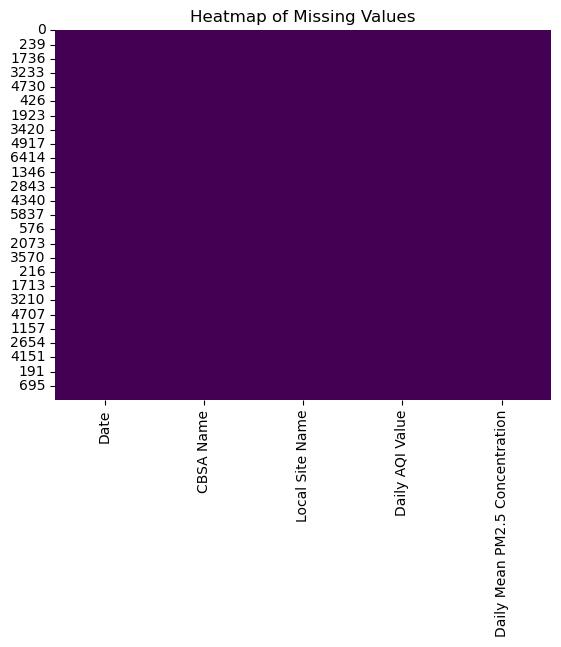

In [32]:
# Check for outliers using interquartile range (IQR)
display("\nChecking for outliers:")
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    display(f"{column}: {len(outliers)} outliers")

# Visualize missing values (optional visualization using heatmap)
try:
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Heatmap of Missing Values")
    plt.show()
except ImportError:
    print("\nSeaborn or Matplotlib not installed. Skipping visualization.")


--- Cleaning Data ---
Removed duplicates: 491 rows dropped.
Missing values handled.


C:\Users\mark_\AppData\Local\Temp\ipykernel_16560\3698707778.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mark_\AppData\Local\Temp\ipykernel_16560\3698707778.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mark_\AppData\

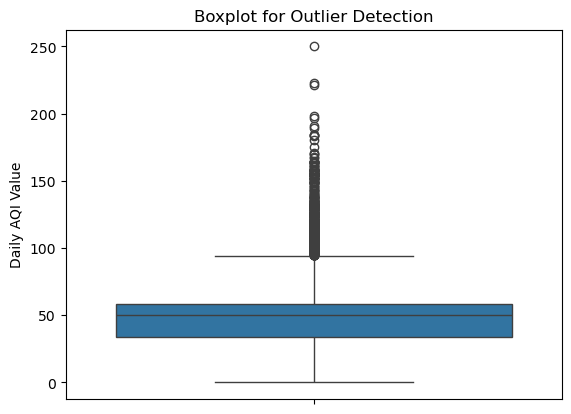

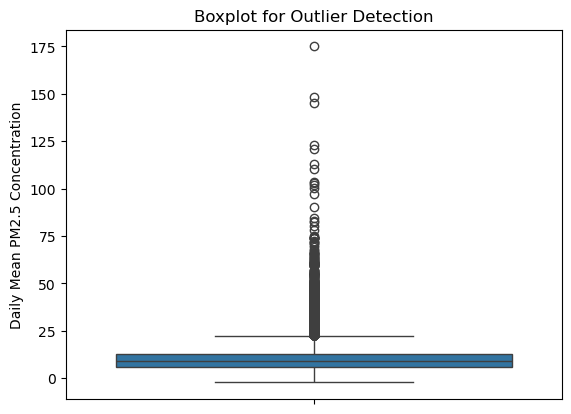

In [33]:
df = clean_data(df)
visualize_outliers(df,'Daily AQI Value')
visualize_outliers(df,'Daily Mean PM2.5 Concentration')

In [34]:
# Display unique values for categorical columns
print("\nUnique Values for Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    display(f"{col}: {df[col].unique()}")


Unique Values for Categorical Columns:


"CBSA Name: ['Juneau, AK' 'Los Angeles-Long Beach-Anaheim, CA' 'St. Louis, MO-IL'\n 'Tallahassee, FL']"

"Local Site Name: ['Floyd Dryden Middle School' 'Azusa' 'Glendora'\n 'Los Angeles-North Main Street' 'Reseda' 'Compton' 'Pico Rivera #2'\n 'Pasadena' 'Long Beach (North)' 'Long Beach (South)'\n 'Long Beach-Route 710 Near Road' 'Santa Clarita'\n 'Lancaster-Division Street' 'Lebec' 'Anaheim' 'Mission Viejo'\n 'North Hollywood (NOHO)' 'JERSEYVILLE WATER TREATMENT PLANT (WTP)'\n 'Gateway Regional Medical Center' 'FIRESTATION #1' 'SIU DENTAL CLINIC'\n 'WATER PLANT' 'IEPA-RAPS TRAILER' 'Arnold West' 'Ladue' 'South Broadway'\n 'Blair Street' 'Branch Street' 'Forest Park'\n 'ALTON HORACE MANN ELEMENTARY SCHOOL' 'Tallahassee Community College'\n 'St. Marks Wildlife Refuge']"

'\nCorrelation Matrix:'

                                    Date  Daily AQI Value  \
Date                            1.000000         0.100936   
Daily AQI Value                 0.100936         1.000000   
Daily Mean PM2.5 Concentration  0.099550         0.937657   

                                Daily Mean PM2.5 Concentration  
Date                                                  0.099550  
Daily AQI Value                                       0.937657  
Daily Mean PM2.5 Concentration                        1.000000  


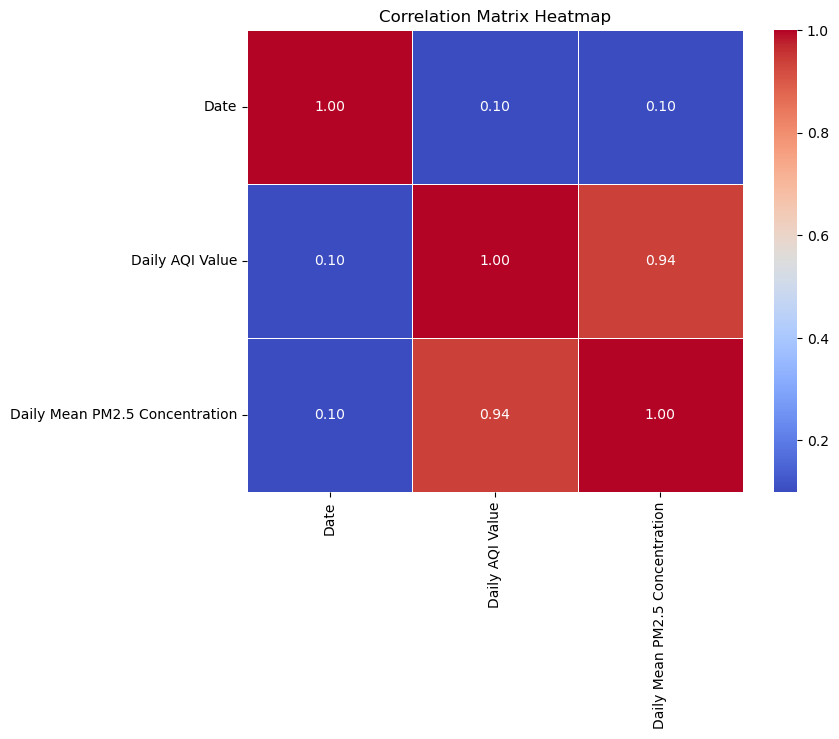

In [35]:
matrix_names = ['Date','Daily AQI Value', 'Daily Mean PM2.5 Concentration']

# Check for correlations between numerical columns using Numpy
display("\nCorrelation Matrix:")
print_and_plot_corr_matrix(df,matrix_names)


'\nCorrelation Matrix for Los Angeles-Long Beach-Anaheim, CA:'

                                    Date  Daily AQI Value  \
Date                            1.000000         0.204582   
Daily AQI Value                 0.204582         1.000000   
Daily Mean PM2.5 Concentration  0.173038         0.942244   

                                Daily Mean PM2.5 Concentration  
Date                                                  0.173038  
Daily AQI Value                                       0.942244  
Daily Mean PM2.5 Concentration                        1.000000  


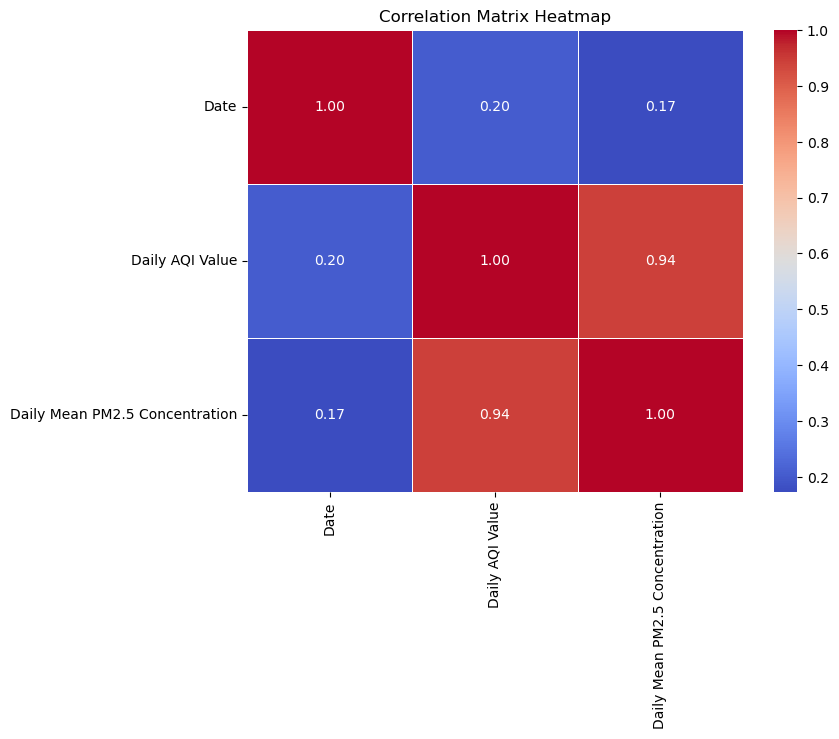

'\nCorrelation Matrix for Tallahassee, FL:'

                                    Date  Daily AQI Value  \
Date                            1.000000        -0.048883   
Daily AQI Value                -0.048883         1.000000   
Daily Mean PM2.5 Concentration -0.063794         0.936748   

                                Daily Mean PM2.5 Concentration  
Date                                                 -0.063794  
Daily AQI Value                                       0.936748  
Daily Mean PM2.5 Concentration                        1.000000  


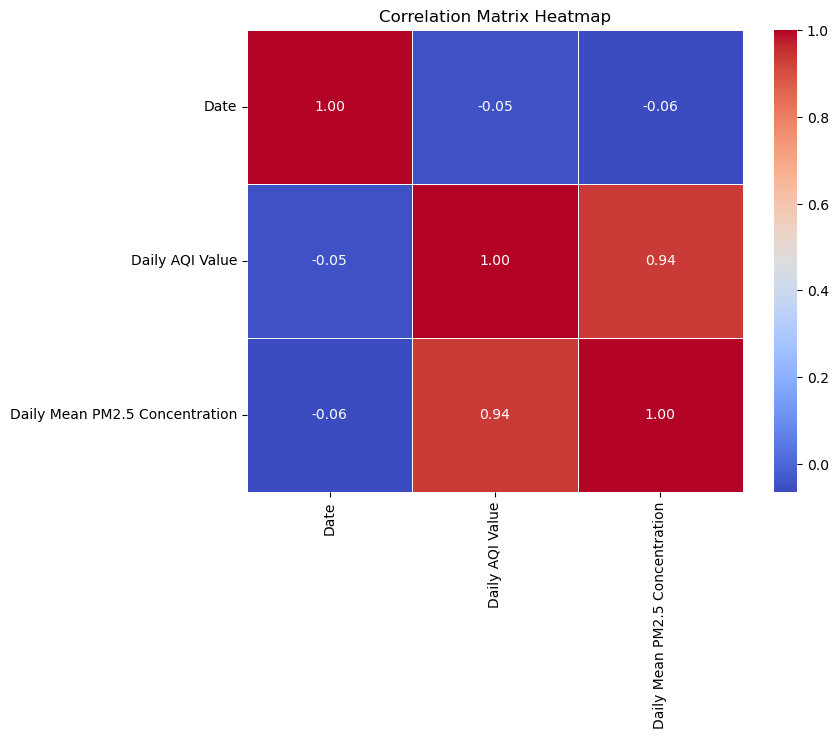

'\nCorrelation Matrix for Juneau, AK:'

                                    Date  Daily AQI Value  \
Date                            1.000000        -0.184259   
Daily AQI Value                -0.184259         1.000000   
Daily Mean PM2.5 Concentration -0.169981         0.957528   

                                Daily Mean PM2.5 Concentration  
Date                                                 -0.169981  
Daily AQI Value                                       0.957528  
Daily Mean PM2.5 Concentration                        1.000000  


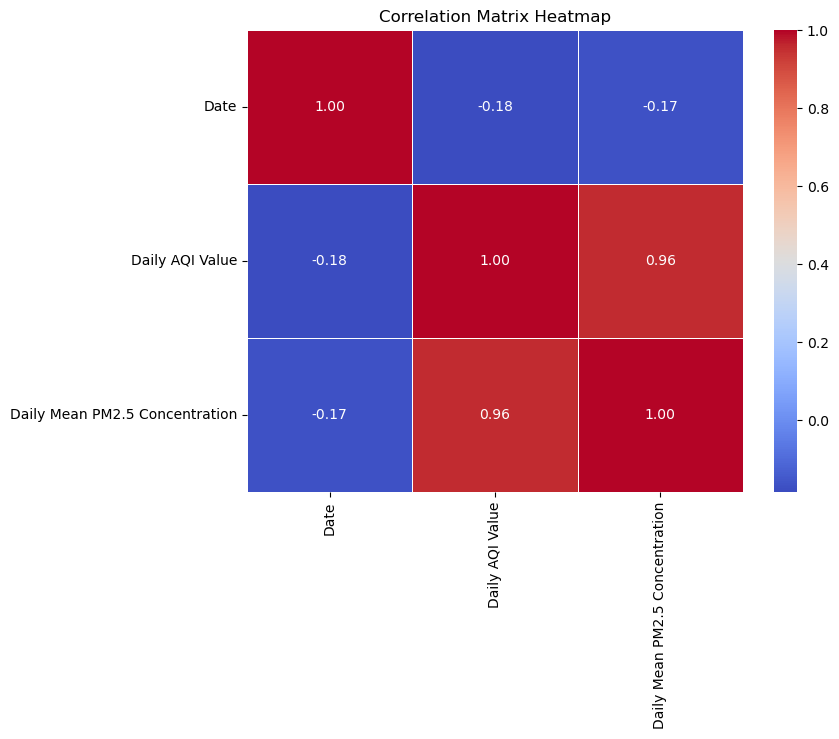

'\nCorrelation Matrix for St. Louis, MO-IL:'

                                    Date  Daily AQI Value  \
Date                            1.000000         0.030982   
Daily AQI Value                 0.030982         1.000000   
Daily Mean PM2.5 Concentration  0.040635         0.946045   

                                Daily Mean PM2.5 Concentration  
Date                                                  0.040635  
Daily AQI Value                                       0.946045  
Daily Mean PM2.5 Concentration                        1.000000  


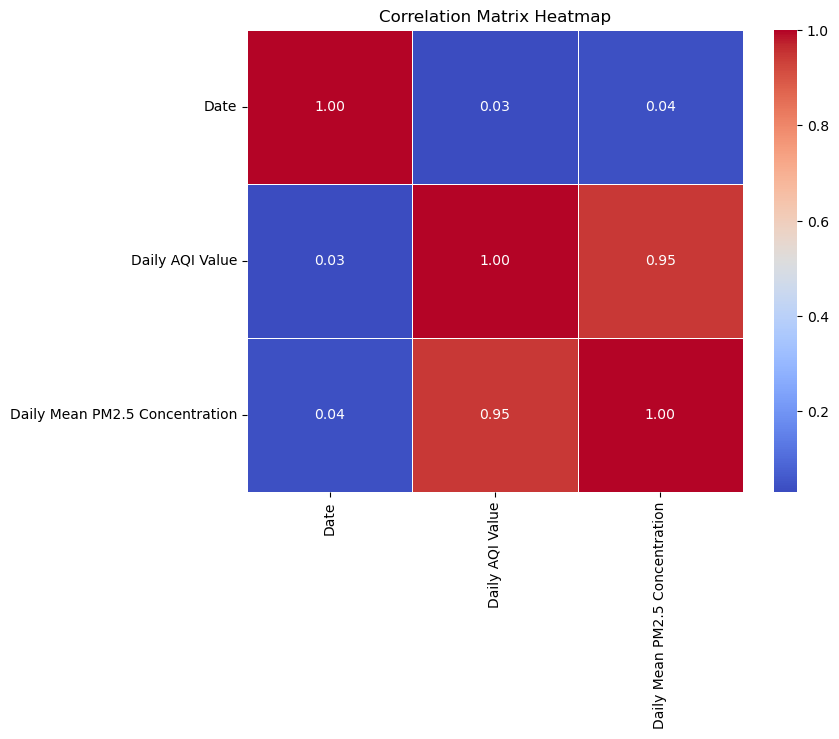

In [36]:
city_names = ["Compton, CA","Tallahassee, FL","Juneau, AK","St. Louis, MO-IL"]
city_column = "CBSA Name"

for city_name in city_names:
    df_slice = slice_by_city(city_name,city_column, df)
    display(f"\nCorrelation Matrix for {city_name}:")
    print_and_plot_corr_matrix(df_slice,matrix_names)
   

,CBSA Name,Local Site Name,Daily AQI Value,Daily Mean PM2.5 Concentration
Date,,,,
2019-01-03,"Los Angeles-Long Beach-Anaheim, CA",Azusa,17,3.0
2019-01-09,"Los Angeles-Long Beach-Anaheim, CA",Azusa,52,9.5
2019-01-15,"Los Angeles-Long Beach-Anaheim, CA",Azusa,8,1.4
2019-01-21,"Los Angeles-Long Beach-Anaheim, CA",Azusa,14,2.6
2019-01-27,"Los Angeles-Long Beach-Anaheim, CA",Azusa,17,3.0
...,...,...,...,...
2021-12-27,"Los Angeles-Long Beach-Anaheim, CA",Mission Viejo,16,2.9
2021-12-28,"Los Angeles-Long Beach-Anaheim, CA",Mission Viejo,22,4.0
2021-12-29,"Los Angeles-Long Beach-Anaheim, CA",Mission Viejo,16,2.8


C:\Users\mark_\AppData\Local\Temp\ipykernel_16560\2610514635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca.sort_index(inplace=True)


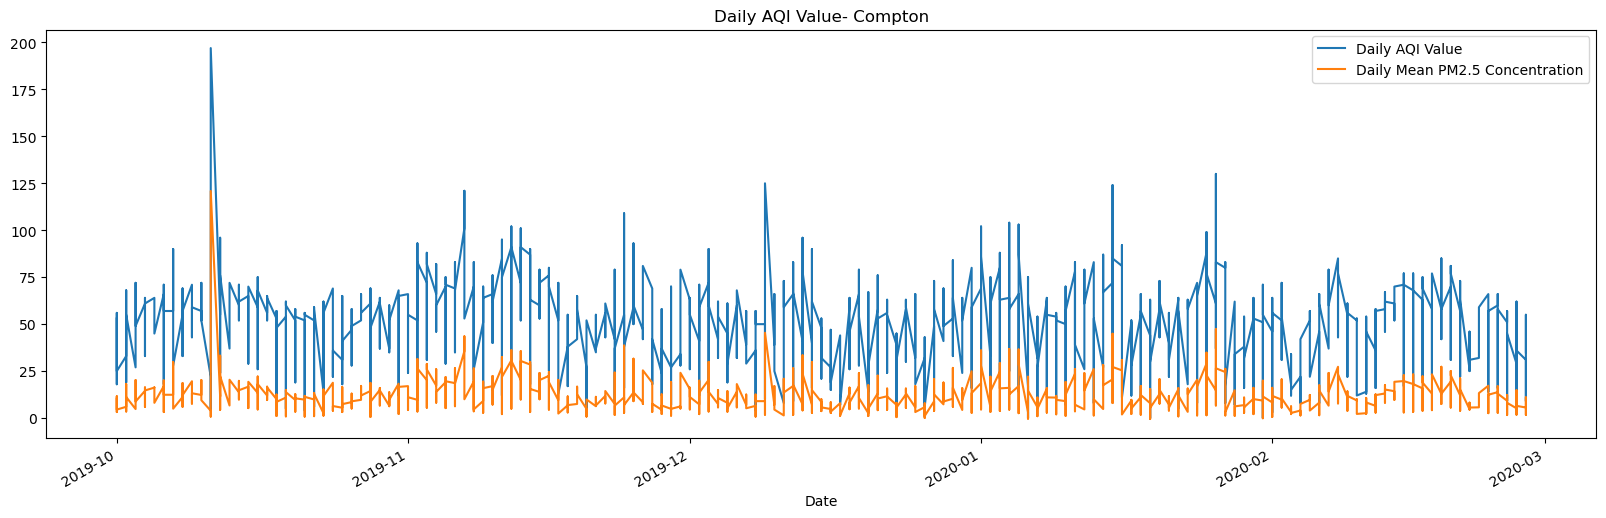

In [44]:

df_ca = slice_by_city(city_names[0],city_column, df)
df_ca.set_index('Date',inplace=True)
display(df_ca)
df_ca.sort_index(inplace=True)
df_six_months_ca = df_ca.loc['2019-10-01' : ' 2020-02-28']

plot_data(df_six_months_ca,'Daily AQI Value- Compton',[20,6])



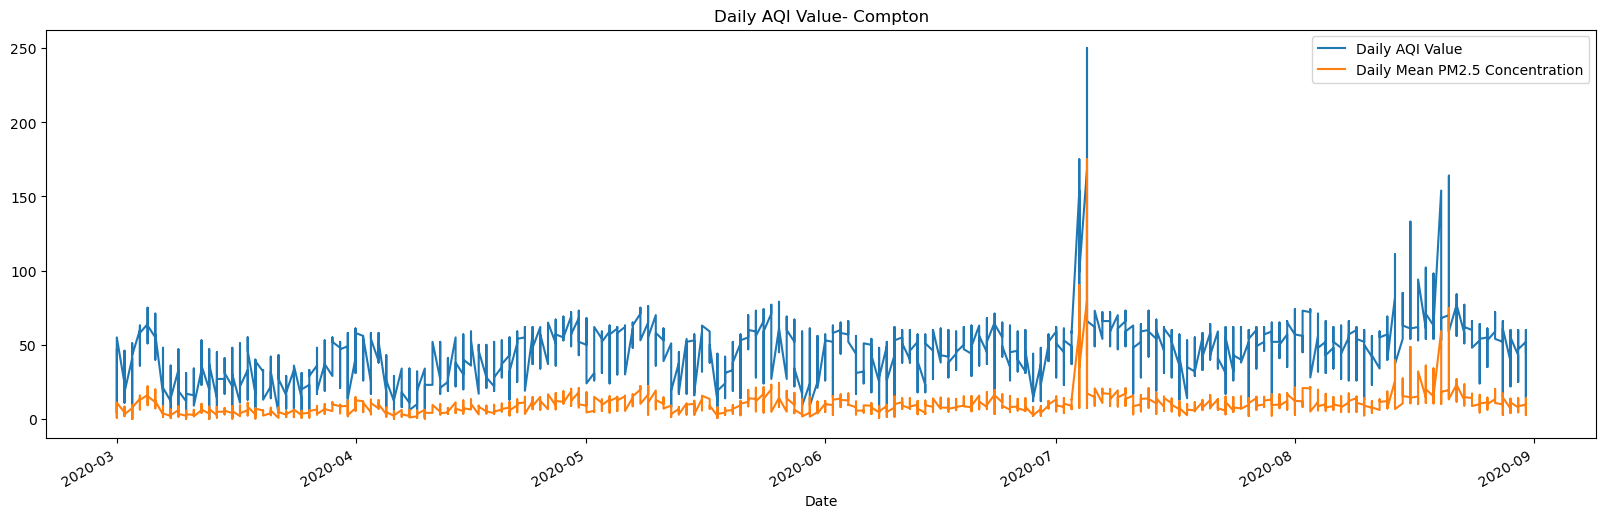

In [45]:
#df_cacombined = pd.concat([df_ca2019_cleaned, 
#                              df_ca2020_cleaned, 
#                              df_ca2021_cleaned], 
#                             axis=0)
#df_cacombined.sort_index(inplace=True)
df_six_months_ca = df_ca.loc['2020-03-01' : ' 2020-08-31']
plot_data(df_six_months_ca,'Daily AQI Value- Compton',[20,6])

# Plot to visualize six months worth of data:
#df_six_months_ca.plot(
#    title= 'Daily AQI Value- Compton',
#    figsize=[20,6]
#)

#plt.show()

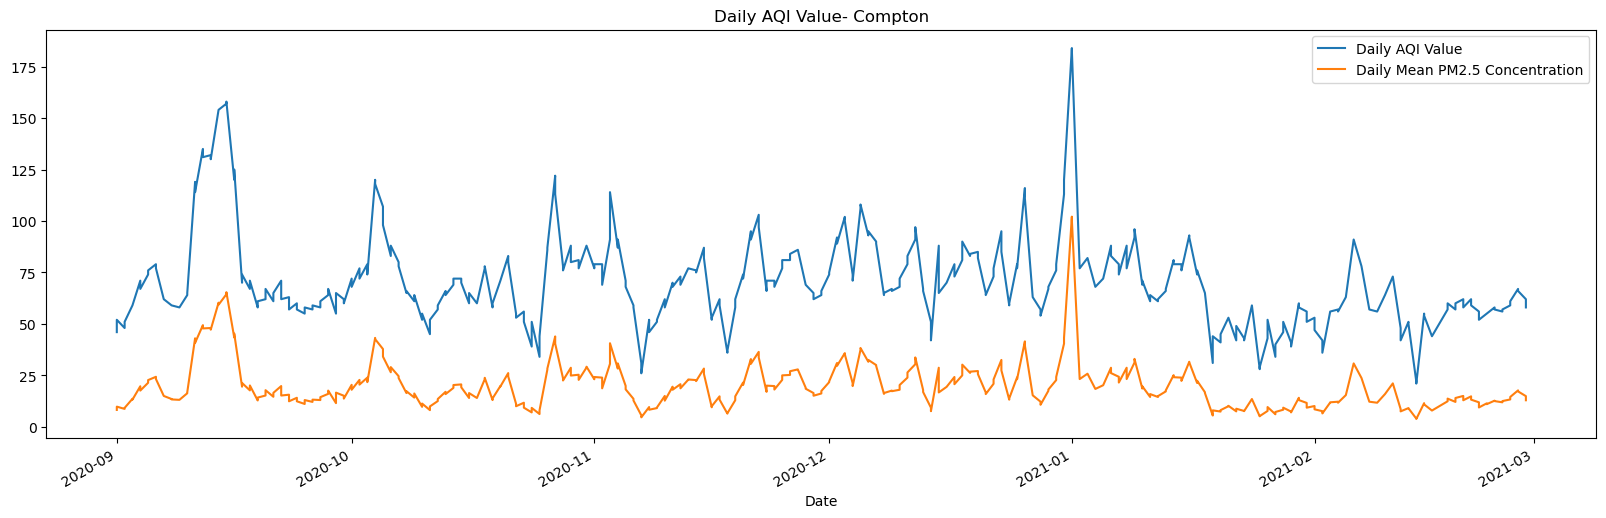

In [139]:
df_cacombined = pd.concat([df_ca2019_cleaned, 
                              df_ca2020_cleaned, 
                              df_ca2021_cleaned], 
                             axis=0)
df_cacombined.sort_index(inplace=True)
df_six_months_ca = df_cacombined.loc['2020-09-01' : ' 2021-02-28']

# Plot to visualize six months worth of data:
df_six_months_ca.plot(
    title= 'Daily AQI Value- Compton',
    figsize=[20,6]
)

plt.show()

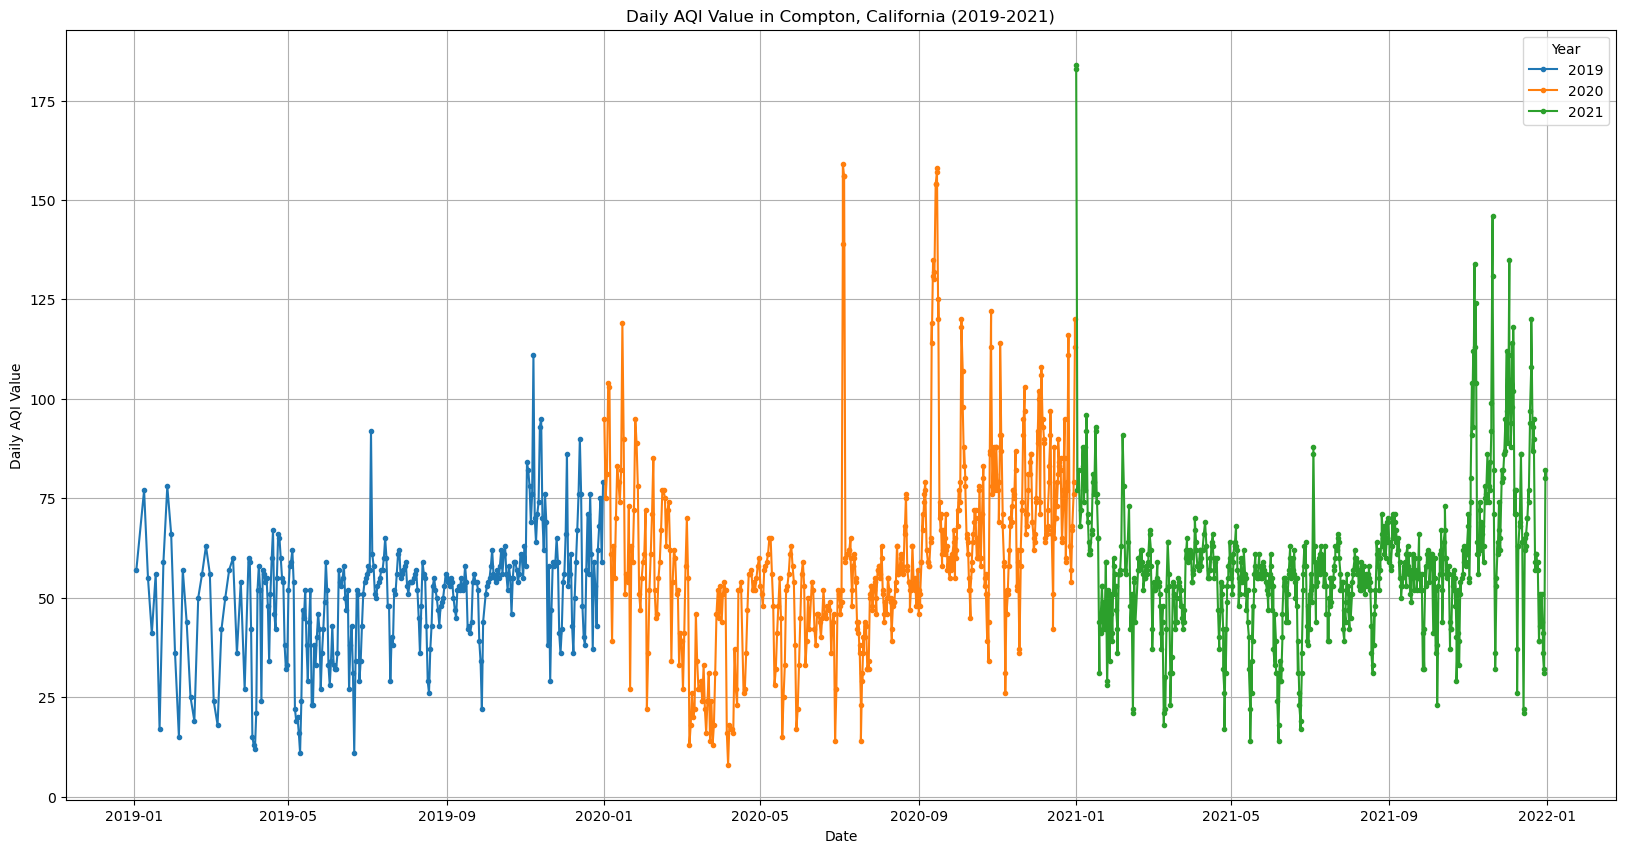

In [140]:
df_cacombined['Year'] = df_cacombined.index.year
plt.figure(figsize=(20, 10))
for year in df_cacombined['Year'].unique():
    df_year = df_cacombined[df_cacombined['Year'] == year]
    plt.plot(df_year.index, df_year['Daily AQI Value'], label=str(year), marker='o', linestyle='-', markersize=3)
plt.title('Daily AQI Value in Compton, California (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.grid(True)
plt.legend(title='Year')
plt.show()

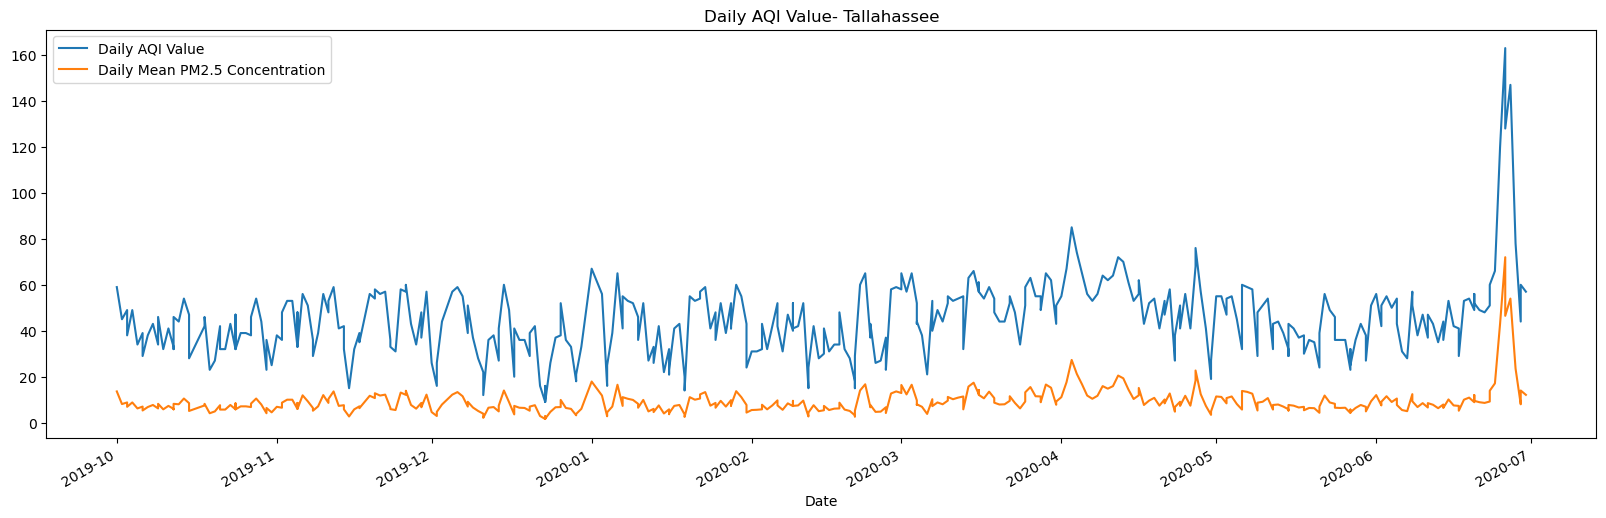

In [142]:
df_flcombined = pd.concat([df_fl2019_cleaned, 
                              df_fl2020_cleaned, 
                              df_fl2021_cleaned], 
                             axis=0)
df_flcombined.sort_index(inplace=True)
df_six_months_fl = df_flcombined.loc['2019-10-01' : '2020-06-30']

# Plot to visualize six months worth of data:
df_six_months_fl.plot(
    title= 'Daily AQI Value- Tallahassee',
    figsize=[20,6]
)

plt.show()

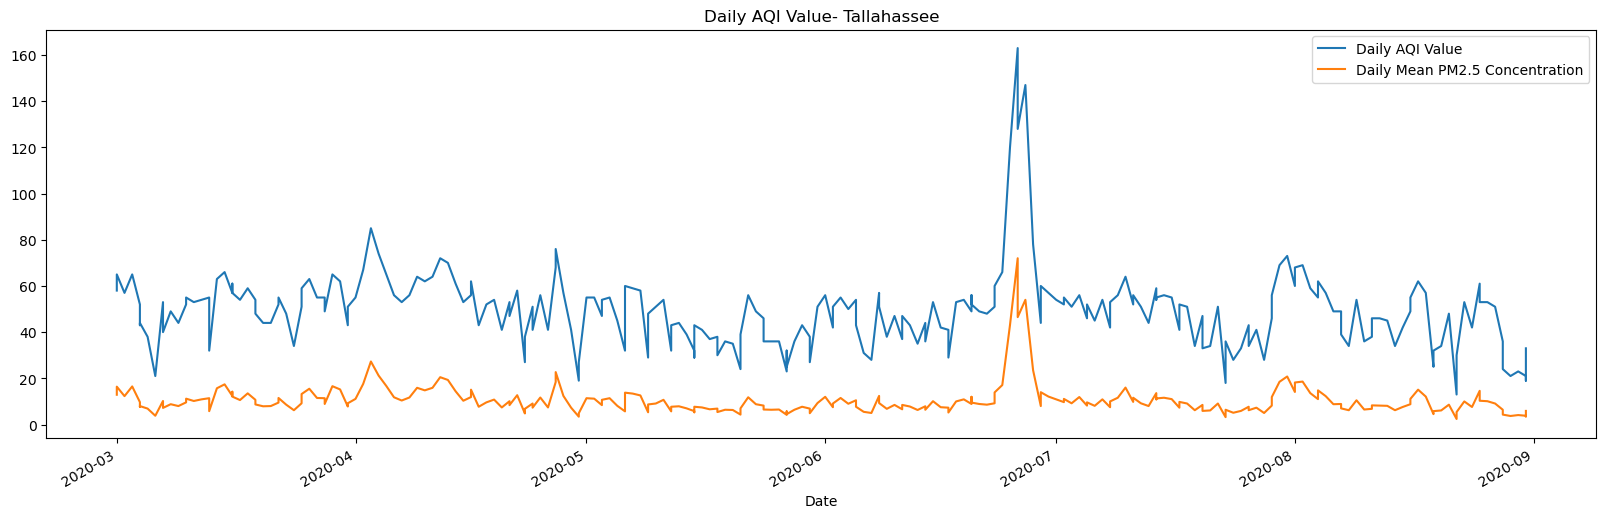

In [143]:
df_flcombined = pd.concat([df_fl2019_cleaned, 
                              df_fl2020_cleaned, 
                              df_fl2021_cleaned], 
                             axis=0)
df_flcombined.sort_index(inplace=True)
df_six_months_fl = df_flcombined.loc['2020-03-01' : '2020-08-31']

# Plot to visualize six months worth of data:
df_six_months_fl.plot(
    title= 'Daily AQI Value- Tallahassee',
    figsize=[20,6]
)

plt.show()

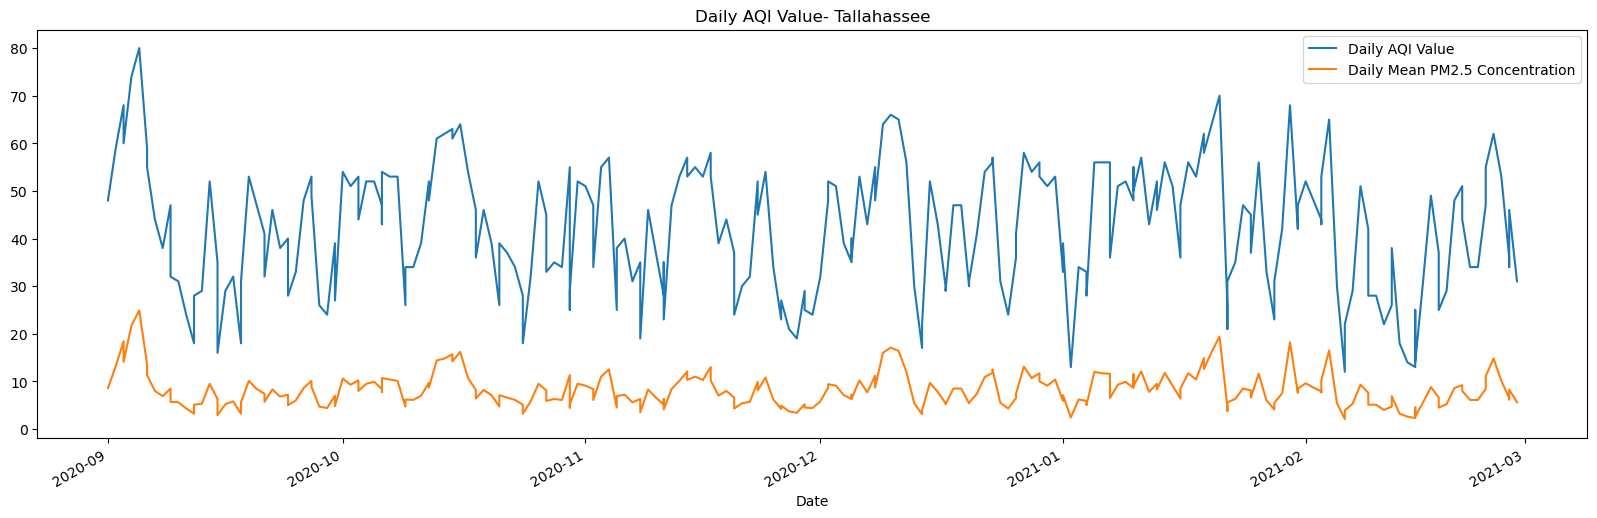

In [144]:
df_flcombined = pd.concat([df_fl2019_cleaned, 
                              df_fl2020_cleaned, 
                              df_fl2021_cleaned], 
                             axis=0)
df_flcombined.sort_index(inplace=True)
df_six_months_fl = df_flcombined.loc['2020-09-01' : '2021-02-28']

# Plot to visualize six months worth of data:
df_six_months_fl.plot(
    title= 'Daily AQI Value- Tallahassee',
    figsize=[20,6]
)

plt.show()

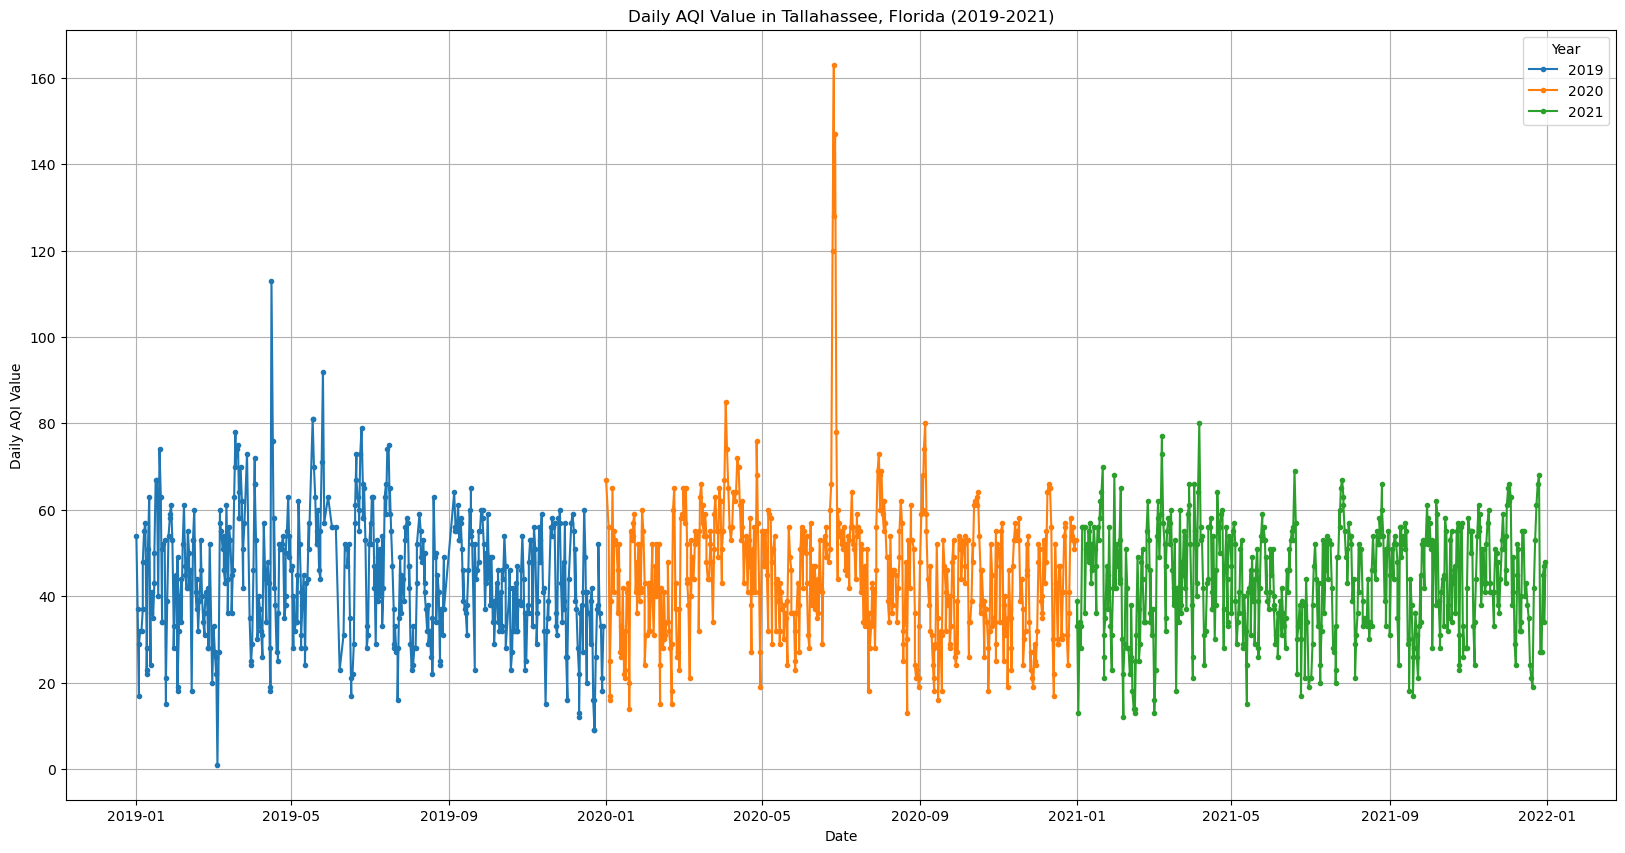

In [145]:
df_flcombined['Year'] = df_flcombined.index.year
plt.figure(figsize=(20, 10))
for year in df_flcombined['Year'].unique():
    df_year = df_flcombined[df_flcombined['Year'] == year]
    plt.plot(df_year.index, df_year['Daily AQI Value'], label=str(year), marker='o', linestyle='-', markersize=3)
plt.title('Daily AQI Value in Tallahassee, Florida (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.grid(True)
plt.legend(title='Year')
plt.show()

In [146]:
#Alaska Data
# 2019 Data:
df_ak2019_parsed =df_ak2019[['Date', 'CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df_ak2019_parsed['Date'] = pd.to_datetime(df_ak2019_parsed['Date'])
df_ak2019_parsed.set_index('Date', inplace=True)
df_ak2019_parsed.dropna(inplace=True)
df_ak2019_parsed
# 2020 Data:
df_ak2020_parsed =df_ak2020[['Date', 'CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df_ak2020_parsed['Date'] = pd.to_datetime(df_ak2020_parsed['Date'])
df_ak2020_parsed.set_index('Date', inplace=True)
df_ak2020_parsed.dropna(inplace=True)
df_ak2020_parsed
# 2021 Data
df_ak2021_parsed =df_ak2021[['Date', 'CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df_ak2021_parsed['Date'] = pd.to_datetime(df_ak2021_parsed['Date'])
df_ak2021_parsed.set_index('Date', inplace=True)
df_ak2021_parsed.dropna(inplace=True)
df_ak2021_parsed

df_combined_ak= pd.concat([df_ak2019_parsed,
                         df_ak2020_parsed,
                         df_ak2021_parsed],
                         axis=0)
df_combined_ak

,CBSA Name,Local Site Name,Daily AQI Value,Daily Mean PM2.5 Concentration
Date,,,,
2019-01-01,"Juneau, AK",Floyd Dryden Middle School,39,7.0
2019-01-02,"Juneau, AK",Floyd Dryden Middle School,29,5.3
2019-01-03,"Juneau, AK",Floyd Dryden Middle School,57,12.2
2019-01-04,"Juneau, AK",Floyd Dryden Middle School,75,22.0
2019-01-05,"Juneau, AK",Floyd Dryden Middle School,81,25.4
...,...,...,...,...
2021-12-27,"Juneau, AK",Floyd Dryden Middle School,56,11.7
2021-12-28,"Juneau, AK",Floyd Dryden Middle School,62,15.2
2021-12-29,"Juneau, AK",Floyd Dryden Middle School,38,6.9


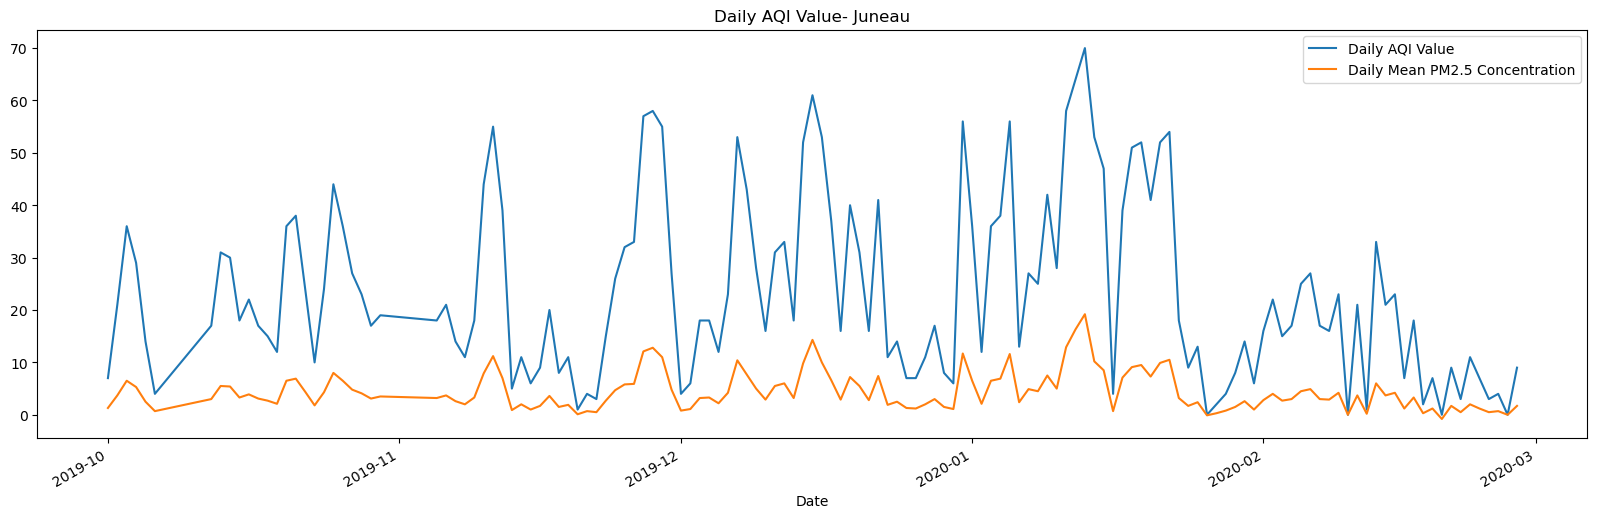

In [147]:
df_combined_ak= pd.concat([df_ak2019_parsed,
                         df_ak2020_parsed,
                         df_ak2021_parsed],
                         axis=0)
df_combined_ak.sort_index(inplace=True)
df_six_months_ak = df_combined_ak.loc['2019-10-01' : '2020-02-28']

# Plot to visualize six months worth of data:
df_six_months_ak.plot(
    title= 'Daily AQI Value- Juneau',
    figsize=[20,6]
)

plt.show()

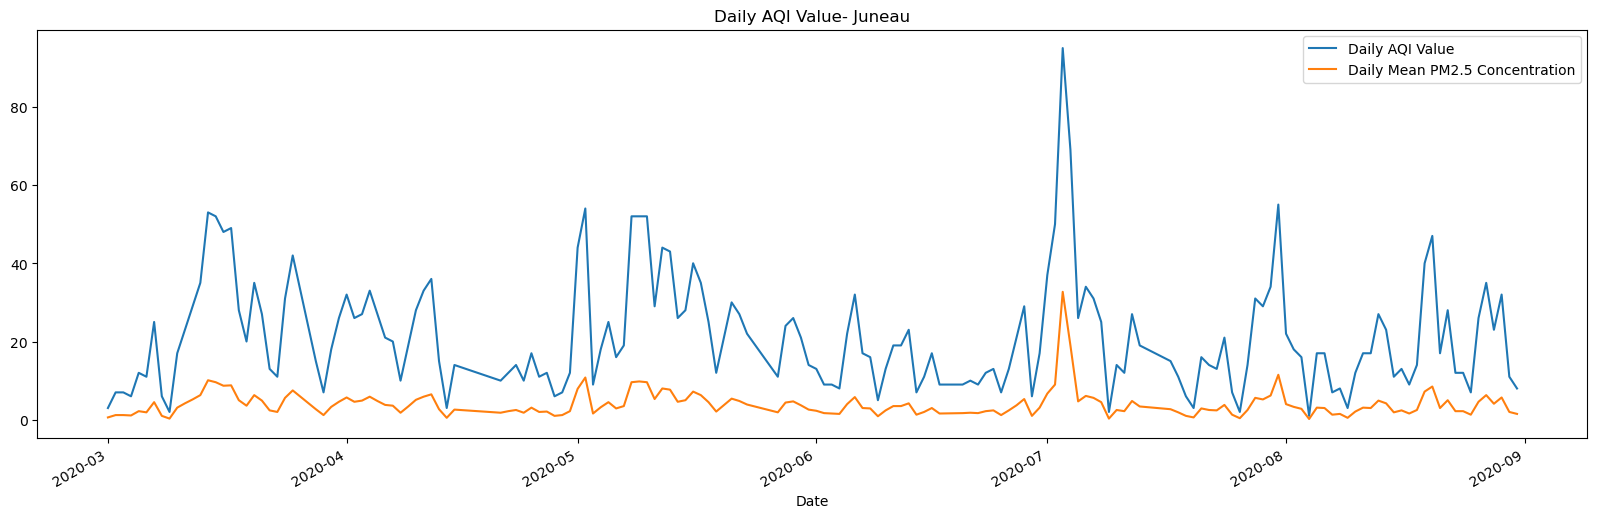

In [148]:
df_combined_ak= pd.concat([df_ak2019_parsed,
                         df_ak2020_parsed,
                         df_ak2021_parsed],
                         axis=0)
df_combined_ak.sort_index(inplace=True)
df_six_months_ak = df_combined_ak.loc['2020-03-01' : '2020-08-31']

# Plot to visualize six months worth of data:
df_six_months_ak.plot(
    title= 'Daily AQI Value- Juneau',
    figsize=[20,6]
)

plt.show()

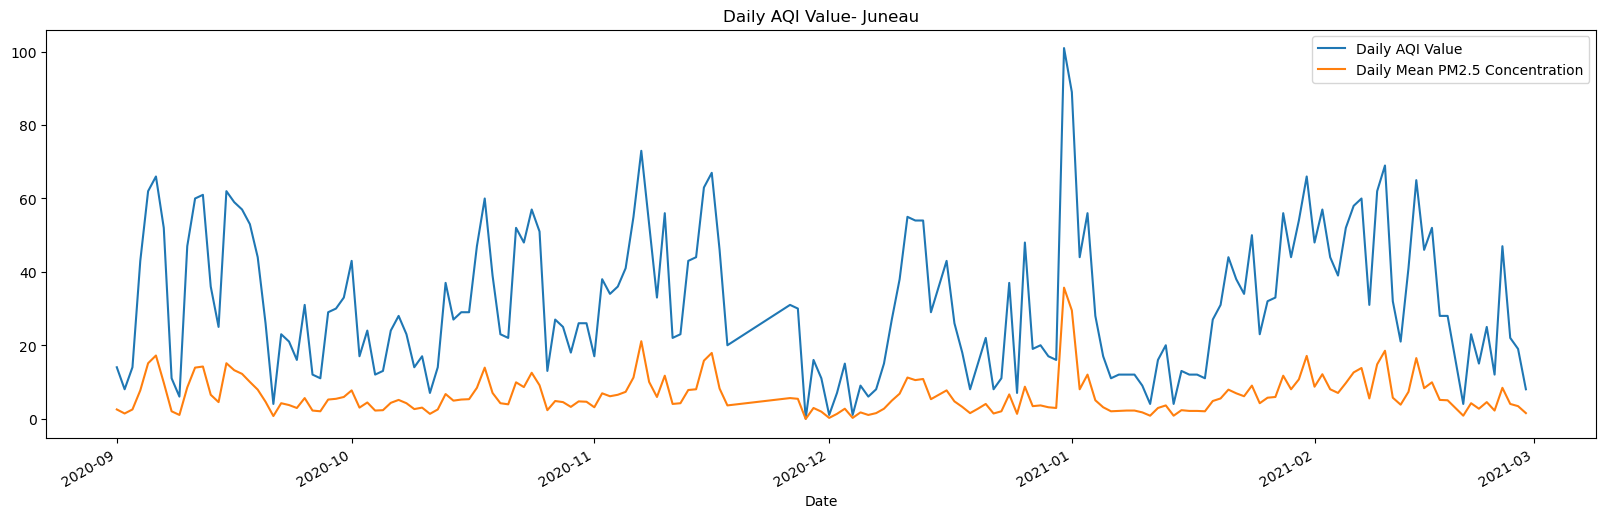

In [149]:
df_combined_ak= pd.concat([df_ak2019_parsed,
                         df_ak2020_parsed,
                         df_ak2021_parsed],
                         axis=0)
df_combined_ak.sort_index(inplace=True)
df_six_months_ak = df_combined_ak.loc['2020-09-01' : '2021-02-28']

# Plot to visualize six months worth of data:
df_six_months_ak.plot(
    title= 'Daily AQI Value- Juneau',
    figsize=[20,6]
)

plt.show()

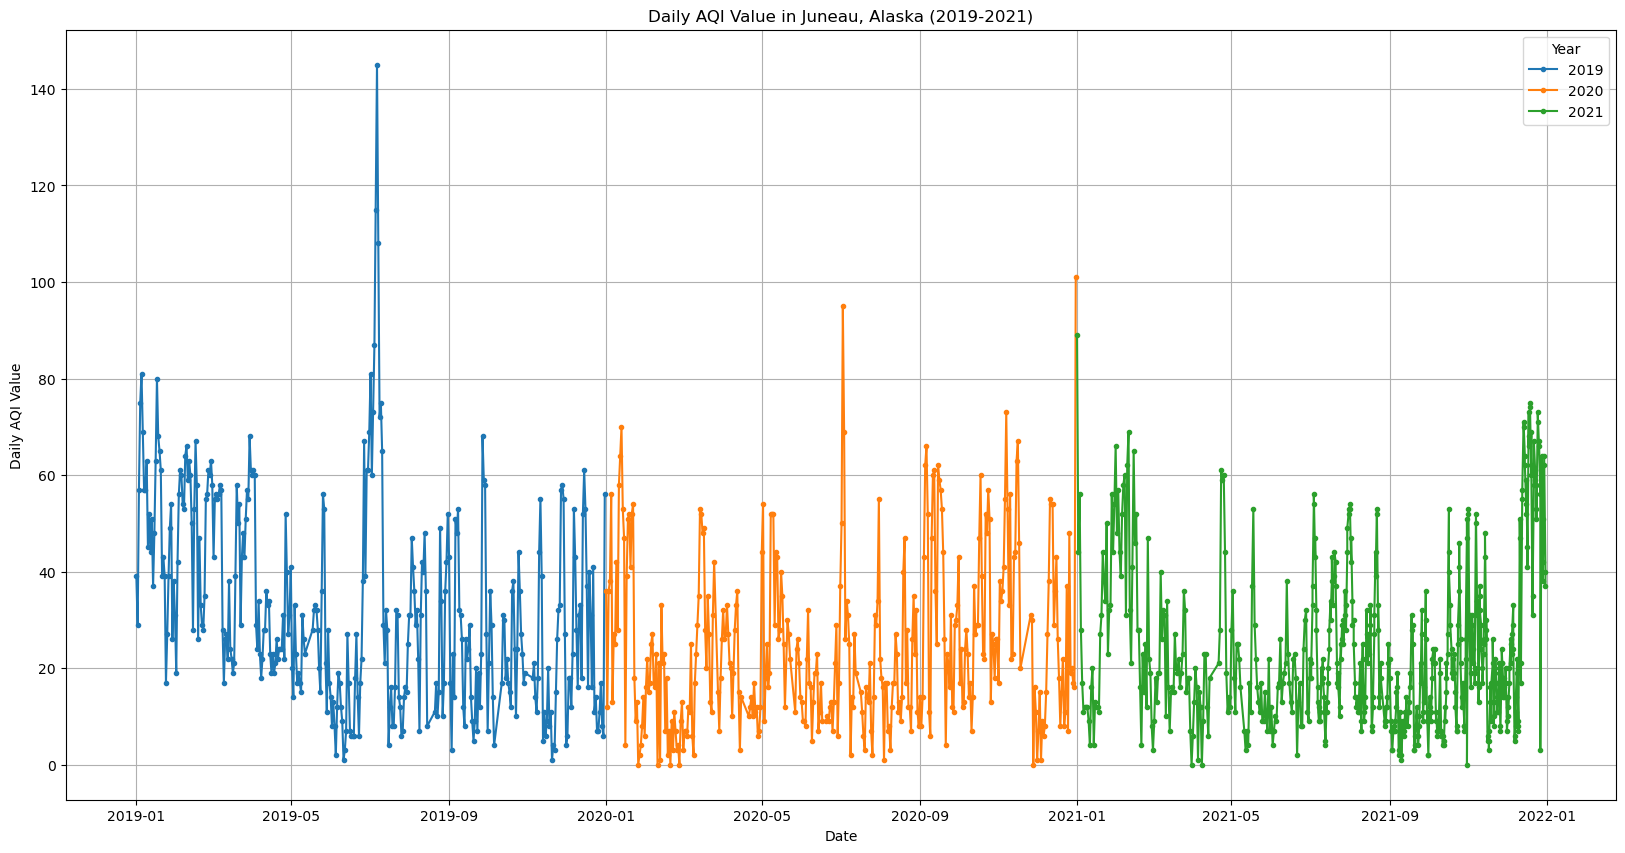

In [150]:
df_combined_ak['Year'] = df_combined_ak.index.year
plt.figure(figsize=(20, 10))
for year in df_flcombined['Year'].unique():
    df_year = df_combined_ak[df_combined_ak['Year'] == year]
    plt.plot(df_year.index, df_year['Daily AQI Value'], label=str(year), marker='o', linestyle='-', markersize=3)
plt.title('Daily AQI Value in Juneau, Alaska (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.grid(True)
plt.legend(title='Year')
plt.show()

In [151]:
# Parse MO Data
#2019
df_mo2019_parsed = df_mo2019[['Date', 'CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df_mo2019_parsed['Date'] = pd.to_datetime(df_mo2019_parsed['Date'])
df_mo2019_parsed.set_index('Date', inplace=True)
df_mo2019_parsed.dropna(inplace=True)
df_mo2019_cleaned = df_mo2019_parsed[df_mo2019_parsed['Local Site Name'] == 'Forest Park']


#2020
df_mo2020_parsed =df_mo2020[['Date','CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df_mo2020_parsed['Date'] = pd.to_datetime(df_mo2020_parsed['Date'])
df_mo2020_parsed.set_index('Date', inplace=True)
df_mo2020_parsed.dropna(inplace=True)
df_mo2020_cleaned= df_mo2020_parsed[df_mo2020_parsed['Local Site Name'] == 'Forest Park']

#2021
df_mo2021_parsed =df_mo2021[['Date','CBSA Name','Local Site Name', 'Daily AQI Value', 'Daily Mean PM2.5 Concentration']].copy()
df_mo2021_parsed['Date'] = pd.to_datetime(df_mo2021_parsed['Date'])
df_mo2021_parsed.set_index('Date', inplace=True)
df_mo2021_parsed.dropna(inplace=True)
df_mo2021_cleaned= df_mo2021_parsed[df_mo2021_parsed['Local Site Name'] == 'Forest Park']

#Concat to one dataframe
df_mocombined = pd.concat([df_mo2019_cleaned, 
                              df_mo2020_cleaned, 
                              df_mo2021_cleaned], 
                             axis=0)


df_mocombined

,CBSA Name,Local Site Name,Daily AQI Value,Daily Mean PM2.5 Concentration
Date,,,,
2019-01-01,"St. Louis, MO-IL",Forest Park,51,9.1
2019-01-02,"St. Louis, MO-IL",Forest Park,51,9.1
2019-01-03,"St. Louis, MO-IL",Forest Park,48,8.7
2019-01-04,"St. Louis, MO-IL",Forest Park,53,10.4
2019-01-05,"St. Louis, MO-IL",Forest Park,60,13.7
...,...,...,...,...
2021-12-27,"St. Louis, MO-IL",Forest Park,46,8.3
2021-12-28,"St. Louis, MO-IL",Forest Park,23,4.2
2021-12-29,"St. Louis, MO-IL",Forest Park,54,10.6


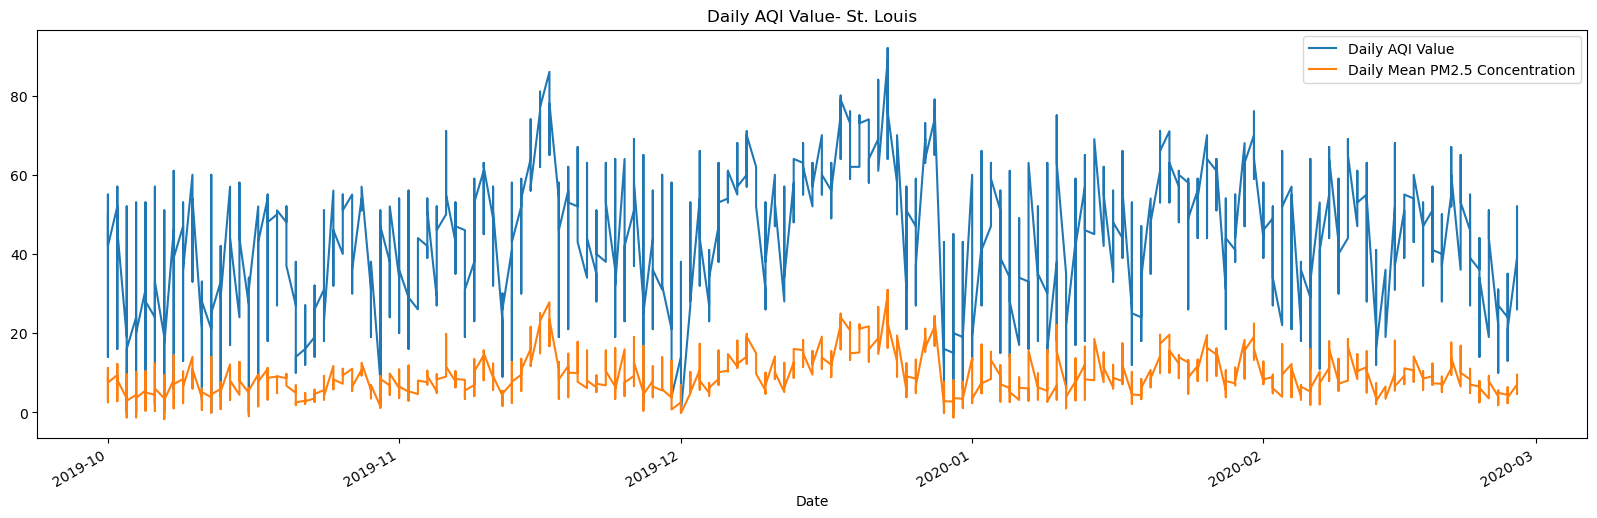

In [152]:
df_mocombined= pd.concat([df_mo2019_parsed,
                         df_mo2020_parsed,
                         df_mo2021_parsed],
                         axis=0)
df_mocombined.sort_index(inplace=True)
df_six_months_mo = df_mocombined.loc['2019-10-01' : ' 2020-02-28']

# Plot to visualize six months worth of data:
df_six_months_mo.plot(
    title= 'Daily AQI Value- St. Louis',
    figsize=[20,6]
)

plt.show()

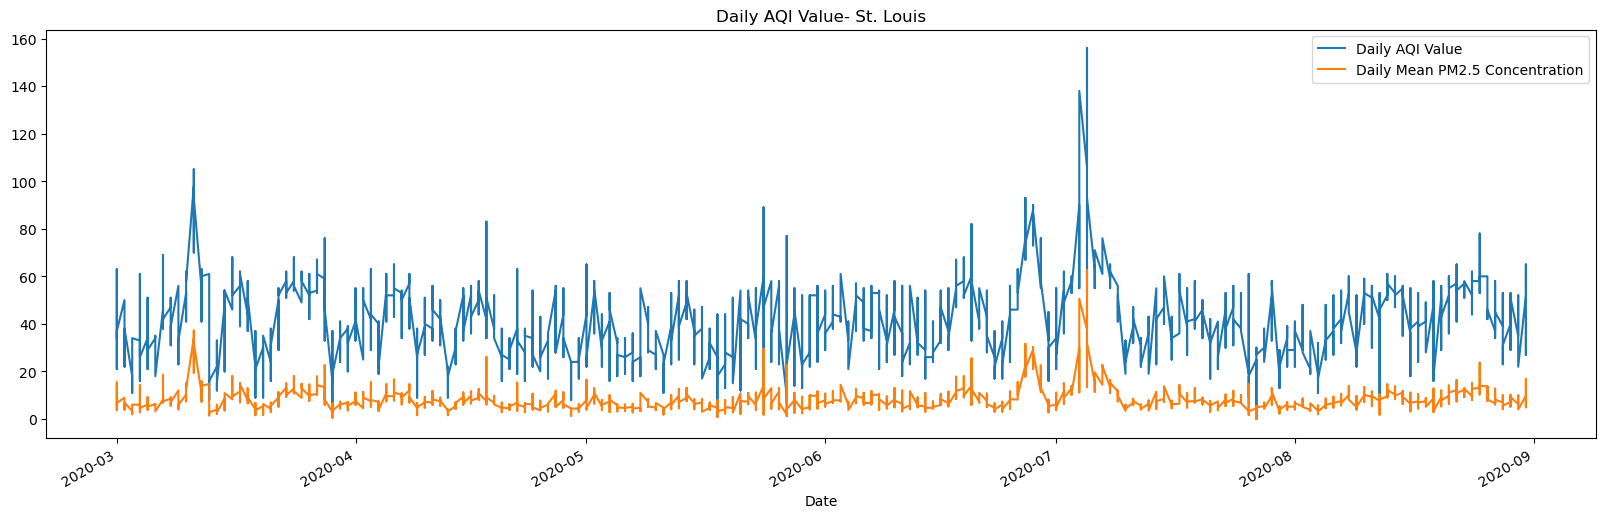

In [153]:
df_mocombined= pd.concat([df_mo2019_parsed,
                         df_mo2020_parsed,
                         df_mo2021_parsed],
                         axis=0)
df_mocombined.sort_index(inplace=True)
df_six_months_mo = df_mocombined.loc['2020-03-01' : '2020-08-31']

# Plot to visualize six months worth of data:
df_six_months_mo.plot(
    title= 'Daily AQI Value- St. Louis',
    figsize=[20,6]
)

plt.show()

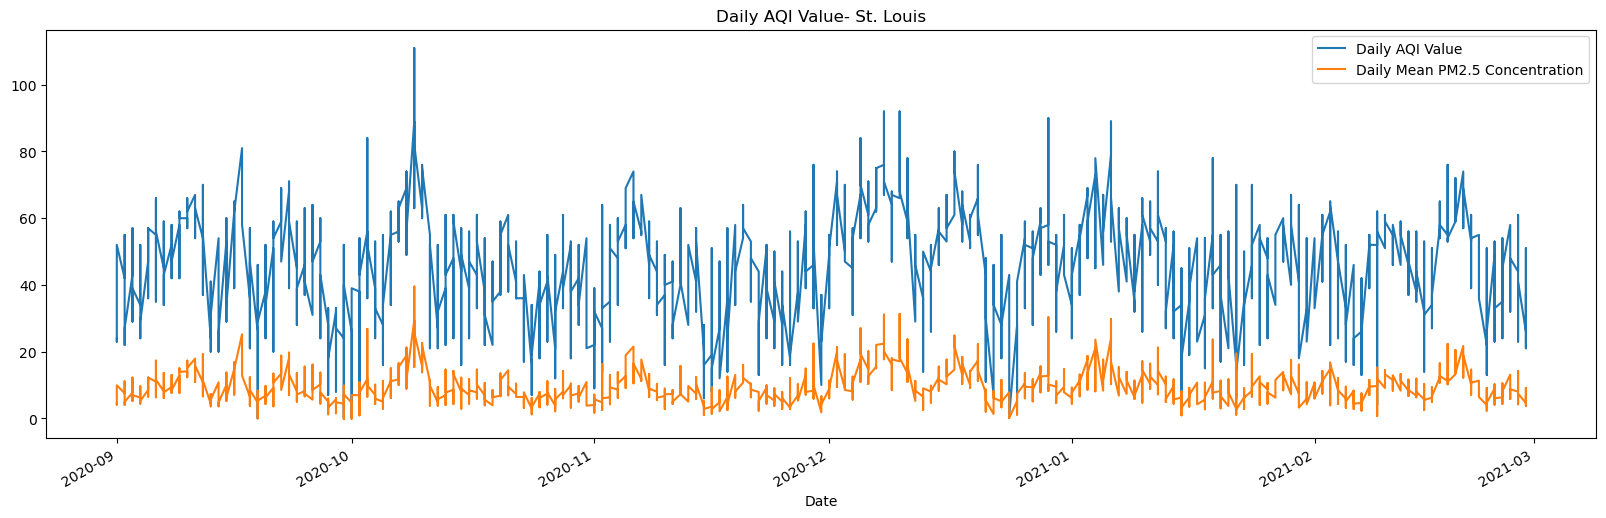

In [154]:
df_mocombined= pd.concat([df_mo2019_parsed,
                         df_mo2020_parsed,
                         df_mo2021_parsed],
                         axis=0)
df_mocombined.sort_index(inplace=True)
df_six_months_mo = df_mocombined.loc['2020-09-01 ' : '2021-02-28']

# Plot to visualize six months worth of data:
df_six_months_mo.plot(
    title= 'Daily AQI Value- St. Louis',
    figsize=[20,6]
)

plt.show()

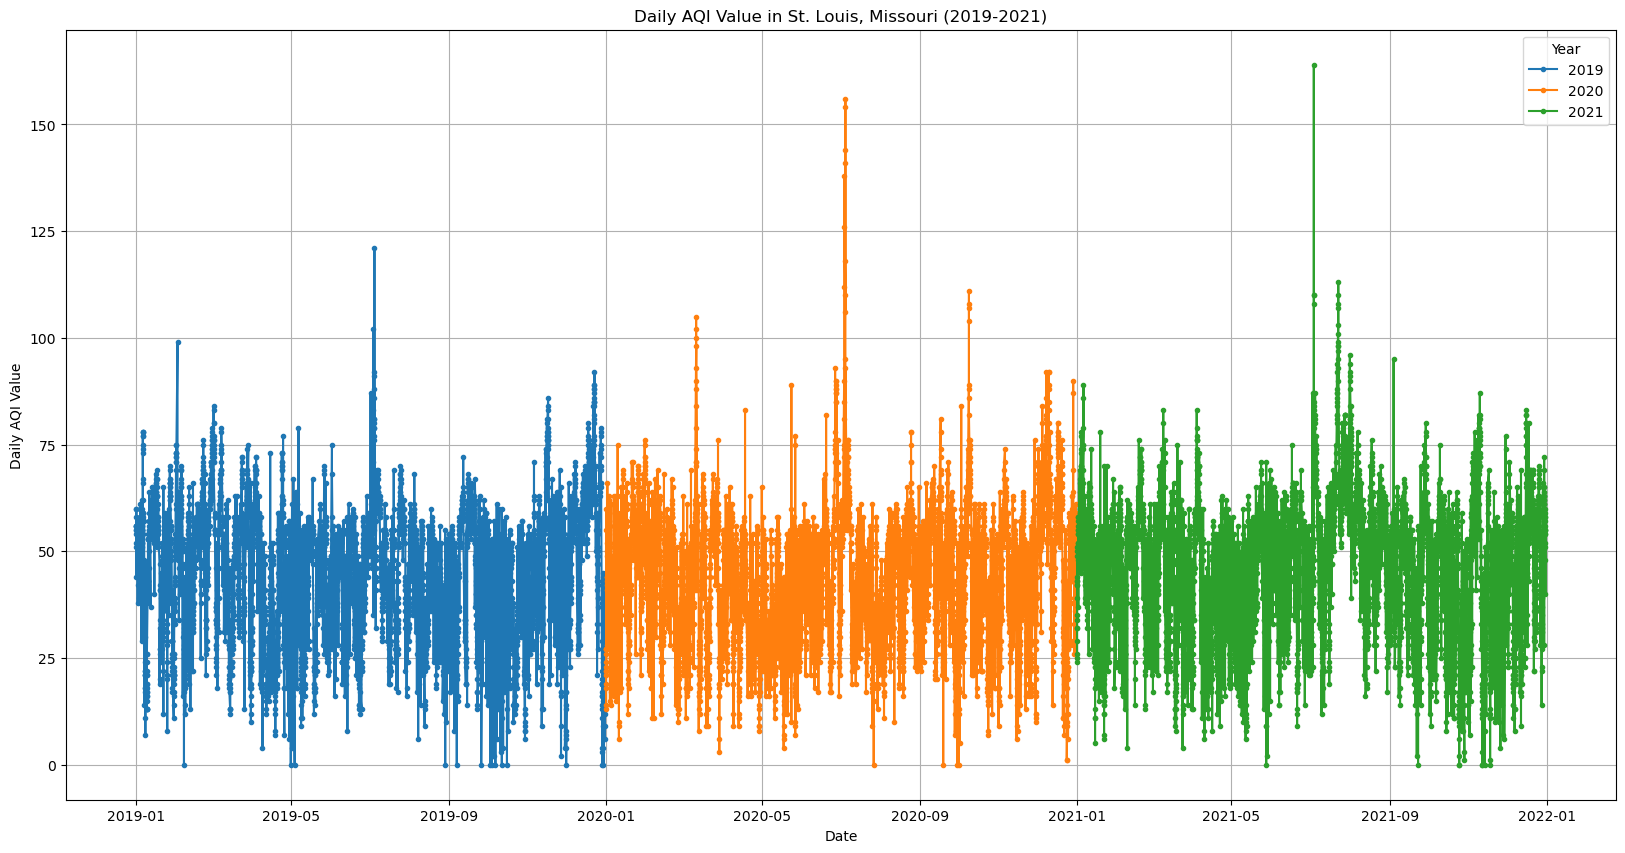

In [155]:
df_mocombined['Year'] = df_mocombined.index.year
plt.figure(figsize=(20, 10))
for year in df_mocombined['Year'].unique():
    df_year = df_mocombined[df_mocombined['Year'] == year]
    plt.plot(df_year.index, df_year['Daily AQI Value'], label=str(year), marker='o', linestyle='-', markersize=3)
plt.title('Daily AQI Value in St. Louis, Missouri (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.grid(True)
plt.legend(title='Year')
plt.show()